#                                       DATA ANALYSIS ON TITANIC DATASET

## Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

__Variable Description__:-

<pre>
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
</pre>                

# Importing the Libraries

In [1]:
%matplotlib inline
import math ,time ,random,datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,label_binarize

# Loading Data

In [2]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Explore the Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape        # for checking no of rows and columns in dataset

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

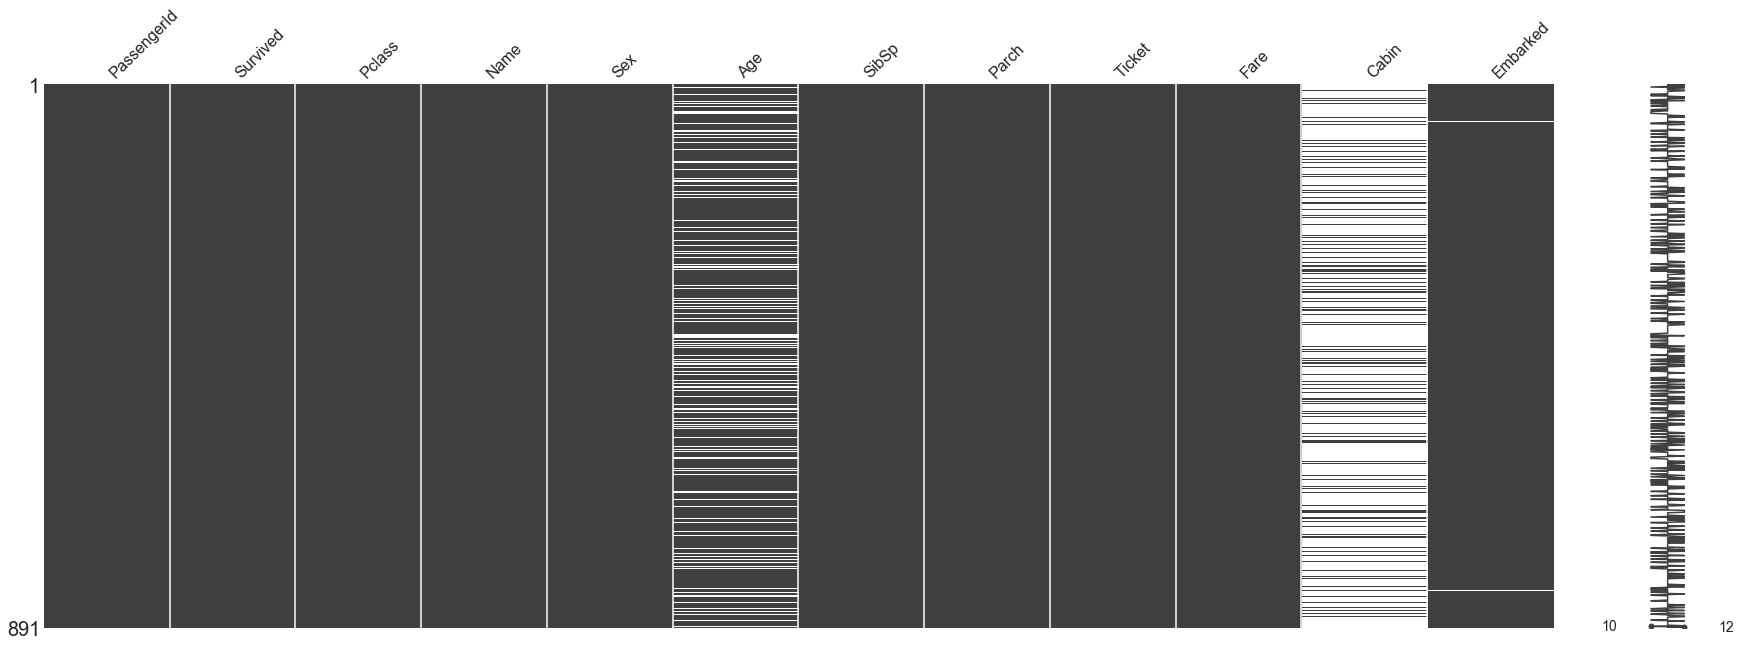

In [8]:
# for visualsing no of missing values 
missingno.matrix(train,figsize=(30,10))

In [9]:
train.isnull().sum()       # for checking count of no of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The Age column seems like an important feature--unfortunately it is missing many values.So we have to fill those values. 

In [12]:
#Filling the missing values of Age:
train['AgeFill'] = train['Age']

# Populate AgeFill
train['AgeFill'] = train['AgeFill'] \
                        .groupby([train['Sex'], train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

# Visualization of Data

# Feature:- Survived

0    549
1    342
Name: Survived, dtype: int64


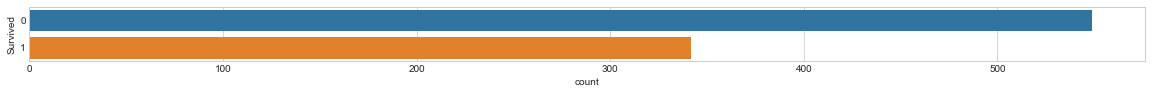

In [13]:
 fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived',data = train)
print(train.Survived.value_counts()) 
sns.set()

# Feature:-Pclass

From our exploratory data analysis,we see there are three passenger classes: First, Second, and Third class.  We'll determine which proportion of passengers survived based on their passenger class.

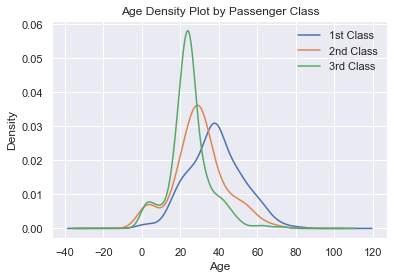

In [14]:
passenger_class = sorted(train['Pclass'].unique())
for pclass in passenger_class:
    train.AgeFill[train.Pclass == pclass].plot(kind='kde')
    
plt.title('Age Density Plot by Passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

More number of people Travel through 3rd class are between age of 20 to 40 

In [15]:
#generate a crosstab of pclass and Survived
p_class = pd.crosstab(train['Pclass'],train['Survived'])
p_class

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


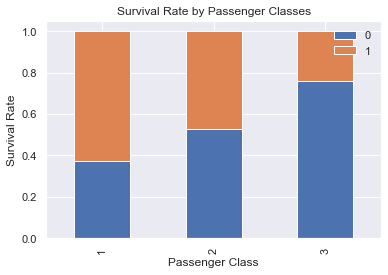

In [16]:
# Normalize the cross tab to sum to 1:
pclass_xt_pct = p_class.div(p_class.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.legend(loc='best')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

We can see that passenger class seems to have a significant impact on whether a passenger survived.Those in First Class the highest chance for survival.

# Feature:-Survived

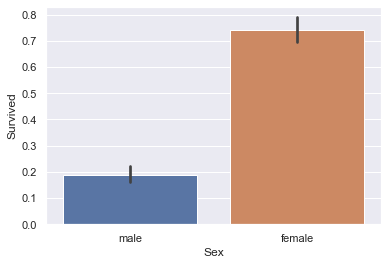

In [17]:
sns.barplot(x='Sex', y='Survived', data = train)

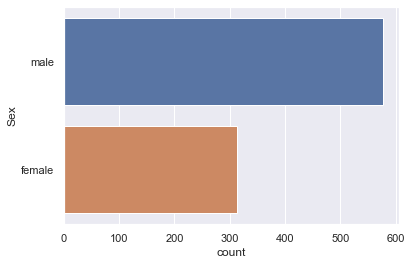

In [18]:
sns.countplot(y = 'Sex',data = train)

As we observed that female has more no of chances of survival  

# Feature:- Family Size

In [19]:
# creating a new feature Family Size
train['FamilySize'] = train['Parch'] + train['SibSp']
test['FamilySize'] = test['Parch'] + test['SibSp']

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,0


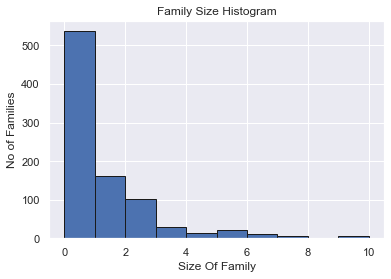

In [21]:
train['FamilySize'].hist(edgecolor='k')
plt.title("Family Size Histogram")
plt.ylabel("No of Families")
plt.xlabel("Size Of Family")
plt.show()

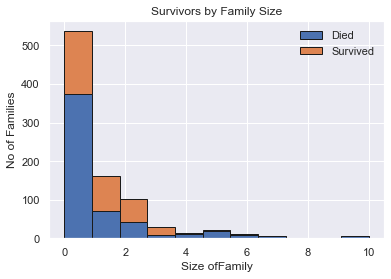

In [22]:
family_sizes = sorted(train['FamilySize'].unique())
family_size_max = max(family_sizes)

df1 = train[train['Survived']==0]['FamilySize']
df2 = train[train['Survived']==1]['FamilySize']

plt.hist([df1,df2],bins = family_size_max + 1,
        range =(0,family_size_max),stacked=True,edgecolor='k')
plt.legend(('Died','Survived'),loc='best')
plt.title("Survivors by Family Size")
plt.xlabel("Size ofFamily")
plt.ylabel("No of Families")
plt.show()

# Feature:-Age 

The Age column seems like an important feature--unfortunately it is missing many values.So we have to fill those values.

In [23]:
#Filling the missing values of Age:
train['AgeFill'] = train['Age']

# Populate AgeFill
train['AgeFill'] = train['AgeFill'] \
                        .groupby([train['Sex'], train['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

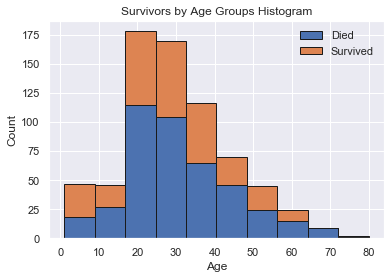

In [24]:
df1 = train[train['Survived'] == 0]['Age']
df2 = train[train['Survived'] == 1]['Age']
max_age=max(train['AgeFill'])
plt.hist([df1, df2],bins=10,range=(1,max_age),stacked=True,edgecolor='k')

plt.legend(('Died', 'Survived'), loc='best')
plt.title('Survivors by Age Groups Histogram')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

As we see that most of the survivors ranges from 20 to 30 age 

# Feature:-Embarked

Let us check the embarkment of the passengers.

C = Cherbourg

Q = Queenstown

S = Southampton

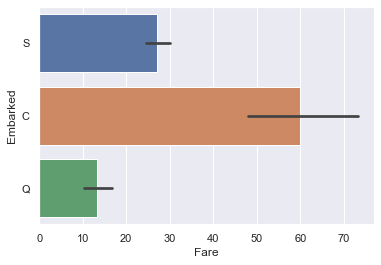

In [25]:
sns.barplot(x="Fare",y="Embarked",data=train,)

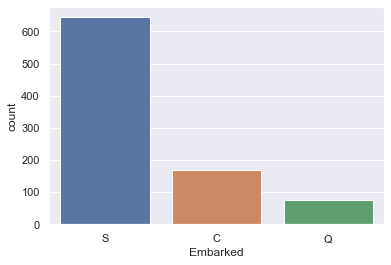

In [26]:
sns.countplot(x = 'Embarked',data = train)

As we observe that maximum no of people are embarked for Southampton

# Feature:- Gender

Gender might have also played a role in determining a passenger's survival rate.Let's visualise the chances of survival through gender

In [27]:
#generate crosstab of Sex and Survived
sex_df=pd.crosstab(train['Sex'],train['Survived'])
sex_df

Survived,0,1
Sex,,
female,81,233
male,468,109


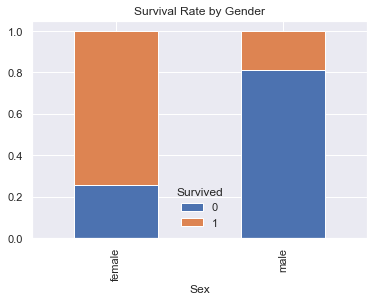

In [28]:
sex_df_pct = sex_df.div(sex_df.sum(1).astype(int),axis=0)
sex_df_pct.plot(kind='bar',stacked='True',title="Survival Rate by Gender")
plt.show()

The majority of females survived, whereas the majority of males did not.

# Feature:-Ticket

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeFill,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,0


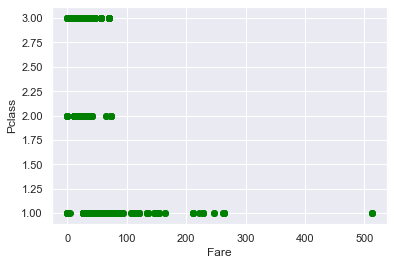

In [30]:
plt.scatter(train["Fare"],train["Pclass"],color='green')
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.show()

# Data Prepration for Machine Learning

Many machine learning algorithms do not work on strings and they usually require the data to be in an array, not a DataFrame.

Show only the columns of type 'object' strings

In [31]:
train.dtypes[train.dtypes.map(lambda x: x == 'object')]

Name        object
Sex         object
Ticket      object
Cabin       object
Embarked    object
dtype: object

In [32]:
# So droping the column we won't using
train = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,AgeFill,FamilySize
0,1,0,3,22.0,1,0,7.2500,22.0,1
1,2,1,1,38.0,1,0,71.2833,38.0,1
2,3,1,3,26.0,0,0,7.9250,26.0,0
3,4,1,1,35.0,1,0,53.1000,35.0,1
4,5,0,3,35.0,0,0,8.0500,35.0,0


__As some columns we won't need so droping that following columns:__
* The Age column since we will be using the AgeFill column instead.
* The SibSp and Parch columns since we will be using FamilySize instead.
* The PassengerId column since it won't be used as a feature. 

In [34]:
train = train.drop(['Age', 'SibSp', 'Parch', 'PassengerId'], axis=1)
train.dtypes

Survived        int64
Pclass          int64
Fare          float64
AgeFill       float64
FamilySize      int64
dtype: object

In [35]:
train.head()

,Survived,Pclass,Fare,AgeFill,FamilySize
0,0,3,7.2500,22.0,1
1,1,1,71.2833,38.0,1
2,1,3,7.9250,26.0,0
3,1,1,53.1000,35.0,1
4,0,3,8.0500,35.0,0


In [36]:
train_data = train.values
train_data

array([[ 0.    ,  3.    ,  7.25  , 22.    ,  1.    ],
       [ 1.    ,  1.    , 71.2833, 38.    ,  1.    ],
       [ 1.    ,  3.    ,  7.925 , 26.    ,  0.    ],
       ...,
       [ 0.    ,  3.    , 23.45  , 21.5   ,  3.    ],
       [ 1.    ,  1.    , 30.    , 26.    ,  0.    ],
       [ 0.    ,  3.    ,  7.75  , 32.    ,  0.    ]])

# Data Wrangling Summary

This fuction is summary of the data wrangling we performed on our training data set.We encapsulate this in a function.

In [37]:
def clean_data(df, drop_passenger_id):    
    # Fill in missing values of Fare with the average Fare
    if len(df[df['Fare'].isnull()] > 0):
        avg_fare = df['Fare'].mean()
        df.replace({ None: avg_fare }, inplace=True)
    
    # To keep Age in tact, make a copy of it called AgeFill 
    # that we will use to fill in the missing ages:
    df['AgeFill'] = df['Age']

    # Determine the Age typical for each passenger class by Sex_Val.  
    # We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
    df['AgeFill'] = df['AgeFill'] \
                        .groupby([df['Sex_Val'], df['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))
            
    # Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
    df['FamilySize'] = df['SibSp'] + df['Parch']
    
    # Drop the columns we won't use:
    df = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
    
    # Drop the Age column since we will be using the AgeFill column instead.
    # Drop the SibSp and Parch columns since we will be using FamilySize.
    # Drop the PassengerId column since it won't be used as a feature.
    df = df.drop(['Age', 'SibSp', 'Parch'], axis=1)
    
    if drop_passenger_id:
        df = df.drop(['PassengerId'], axis=1)
    
    return df

In [38]:
train.head()

,Survived,Pclass,Fare,AgeFill,FamilySize
0,0,3,7.2500,22.0,1
1,1,1,71.2833,38.0,1
2,1,3,7.9250,26.0,0
3,1,1,53.1000,35.0,1
4,0,3,8.0500,35.0,0


# Random Forest: Training

In [39]:
#create random forest object
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

Fill training data and create decision trees

In [40]:
# Training data features, skip the first column 'Survived'
train_features = train_data[:, 1:]

# 'Survived' column values
train_target = train_data[:, 0]

# Fit the model to our training data
clf = clf.fit(train_features, train_target)
score = clf.score(train_features, train_target)
"Mean accuracy of Random Forest: {0}".format(score)

'Mean accuracy of Random Forest: 0.9708193041526375'

# Random Forest: Predicting

In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

As we are predicting so there is no Survived feature in test data

In [43]:
# For filling missing value of feature:- Age
test['AgeFill'] = test['Age']


test['AgeFill'] = test['AgeFill'] \
                       .groupby([test['Sex'], test['Pclass']]) \
                        .apply(lambda x: x.fillna(x.median()))

In [44]:
#drop those feature which are not trained in model
test = test.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
#test = test.drop(['Age', 'SibSp', 'Parch', 'PassengerId'], axis=1)

test.dtypes

PassengerId      int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
FamilySize       int64
AgeFill        float64
dtype: object

In [45]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,FamilySize,AgeFill
0,892,3,34.5,0,0,7.8292,0,34.5
1,893,3,47.0,1,0,7.0000,1,47.0
2,894,2,62.0,0,0,9.6875,0,62.0
3,895,3,27.0,0,0,8.6625,0,27.0
4,896,3,22.0,1,1,12.2875,2,22.0


In [46]:
test_data = test.values
test_data

array([[8.92000e+02, 3.00000e+00, 3.45000e+01, ..., 7.82920e+00,
        0.00000e+00, 3.45000e+01],
       [8.93000e+02, 3.00000e+00, 4.70000e+01, ..., 7.00000e+00,
        1.00000e+00, 4.70000e+01],
       [8.94000e+02, 2.00000e+00, 6.20000e+01, ..., 9.68750e+00,
        0.00000e+00, 6.20000e+01],
       ...,
       [1.30700e+03, 3.00000e+00, 3.85000e+01, ..., 7.25000e+00,
        0.00000e+00, 3.85000e+01],
       [1.30800e+03, 3.00000e+00,         nan, ..., 8.05000e+00,
        0.00000e+00, 2.40000e+01],
       [1.30900e+03, 3.00000e+00,         nan, ..., 2.23583e+01,
        2.00000e+00, 2.40000e+01]])

# Evaluate Model Accuracy

In [47]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Split 80-20 train vs test data
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.20, 
                                                    random_state=0)
print (train_features.shape, train_target.shape)
print (train_x.shape, train_y.shape)
print (test_x.shape, test_y.shape)

(891, 4) (891,)
(712, 4) (712,)
(179, 4) (179,)


In [48]:
clf = clf.fit(train_x, train_y)
predict_y = clf.predict(test_x)

from sklearn.metrics import accuracy_score
print ("Accuracy = %.2f" % (accuracy_score(test_y, predict_y)))

Accuracy = 0.71


In [49]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            predict_y, 
                            target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.79      0.77       110
    Survived       0.63      0.58      0.61        69

    accuracy                           0.71       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.71      0.71      0.71       179



# Conclusion:- 

__From Expolatory Data Analysis of Titanic DataSet we conclude that:-__
   * There were more number of people from Southampton.
   * More number of females survived as compare to number of males.
   * Maximum number of people survived are from 1st Passenger Class.
   * Maximum number of people travelled are from age 20 to 30.